# Metadata Exploration

## Import Libraries

In [2]:
import polars as pl
from plotnine import ggplot, aes, geom_col, theme_bw, labs, geom_bar

## Import Metadata

In [8]:
metadata = pl.read_csv("../data/processed/metadata_temp.csv")
metadata.head()
metadata.shape
metadata.describe()

statistic,file_path,emotion,dataset,actor,index,sample_rate
str,str,str,str,str,f64,f64
"""count""","""11318""","""11318""","""11318""","""11318""",11318.0,11318.0
"""null_count""","""0""","""0""","""0""","""0""",0.0,0.0
"""mean""",null,null,null,null,2775.833098,16000.0
"""std""",null,null,null,null,2214.32612,0.0
"""min""","""../data/processed/audio_16k/cr…","""angry""","""crema-d""","""01""",1.0,16000.0
"""25%""",null,null,null,null,868.0,16000.0
"""50%""",null,null,null,null,2092.0,16000.0
"""75%""",null,null,null,null,4613.0,16000.0
"""max""","""../data/processed/audio_16k/sa…","""sad""","""tess""","""YAF""",7442.0,16000.0


## Visualizing Distribution

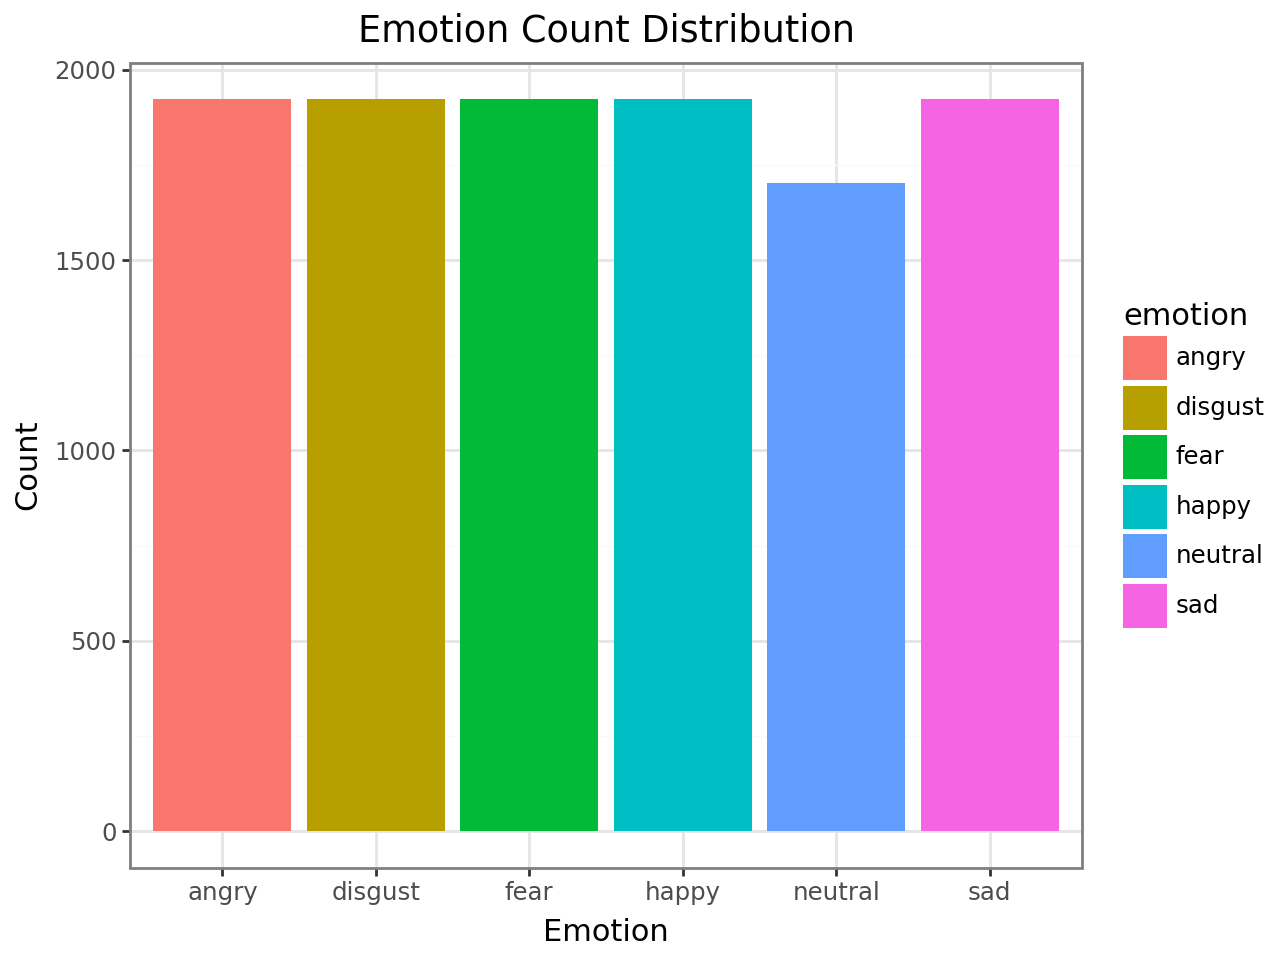

In [9]:
aggregated_data = (
    metadata
    .group_by("emotion")
    .agg(pl.len().alias("count"))
)
(
    ggplot(aggregated_data, aes(x="emotion", y="count", fill="emotion")) +
    geom_col() +
    labs(
        title = "Emotion Count Distribution",
        x = "Emotion",
        y = "Count"
    ) +
    theme_bw()
)

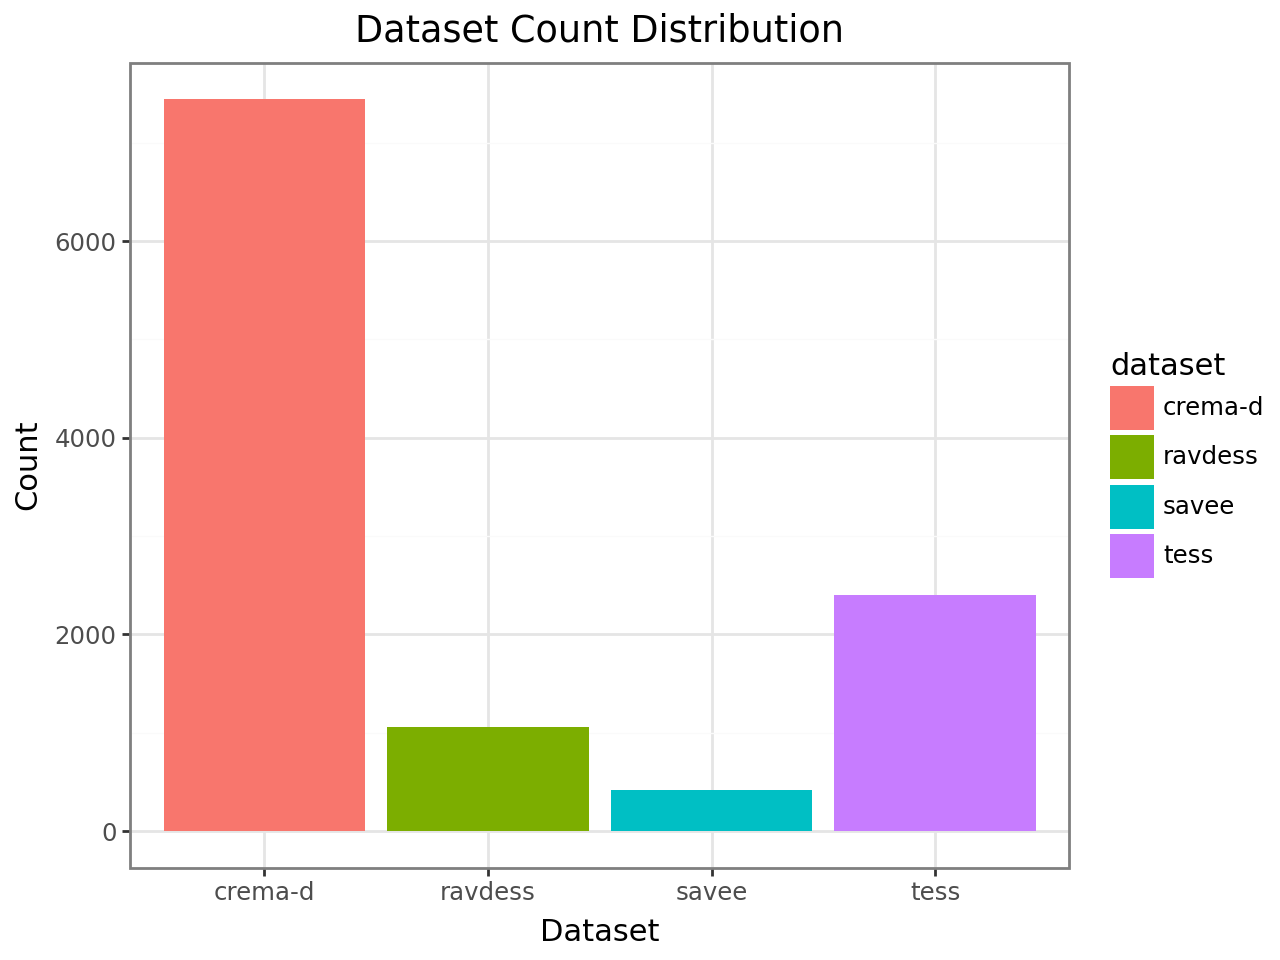

In [10]:
aggregated_data = (
    metadata
    .group_by("dataset")
    .agg(pl.len().alias("count"))
)
(
    ggplot(aggregated_data, aes(x="dataset", y="count", fill="dataset")) +
    geom_col() +
    labs(
        title = "Dataset Count Distribution",
        x = "Dataset",
        y = "Count"
    ) +
    theme_bw()
)

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/processed/metadata.csv")

df.loc[df["actor"].isin(["OAF", "YAF"]), "dataset"] = "tess"

df.to_csv("../data/processed/metadata_temp.csv", index=False)